In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=04a4f0491a632cddd757e2b8738821e40ace460a487f7a9d671d110bcad4c22b
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import os
import shutil

In [ ]:
sc = SparkContext("local", "baskets_analysis")

In [ ]:
rdd = sc.textFile("/content/drive/MyDrive/Colab_Notebooks/baskets.csv")

In [ ]:
baskets_path = "/content/drive/MyDrive/Colab_Notebooks/baskets.csv"

TASK 1: RDD\
task 1a

In [ ]:
# f1
def f1(path) -> list:
  baskets = sc.textFile(path)
  # Get rid of headers
  header = baskets.first()
  baskets = baskets.filter(lambda line: line != header)

  # Get distinct products
  products = baskets.map(lambda line: line.split(',')[2]).distinct()

  # Sort products based on name
  products = products.sortBy(lambda product: product)
  distinct_products = products.collect()
  return distinct_products

distinct_products_list = f1(baskets_path)
first_ten_products = sc.parallelize(distinct_products_list[:10])
last_ten_products = sc.parallelize(distinct_products_list[-10:])

first_ten_products.saveAsTextFile("./f1/first_ten_products")
last_ten_products.saveAsTextFile("./f1/last_ten_products")

In [ ]:
! cat f1/first_ten_products/part-00000

Instant food products
UHT-milk
abrasive cleaner
artif. sweetener
baby cosmetics
bags
baking powder
bathroom cleaner
beef
berries


In [ ]:
! cat f1/last_ten_products/part-00000

turkey
vinegar
waffles
whipped/sour cream
whisky
white bread
white wine
whole milk
yogurt
zwieback


In [ ]:
! rm -rf f1/

Task 1b,c

In [ ]:
# f2
def f2(path) -> list:
  baskets = sc.textFile(path)
  header = baskets.first()
  baskets = baskets.filter(lambda line: line != header)

  products = baskets.map(lambda line: (line.split(',')[2], 1))\
                                    .countByKey().items()
  product_freq_desc = sorted(products,\
                             key=lambda product: product[1], \
                             reverse=True
                             )
  return product_freq_desc

product_freq_list = f2(baskets_path)

top_100_products = sc.parallelize(product_freq_list[:100])
top_100_products.saveAsTextFile("./f2")


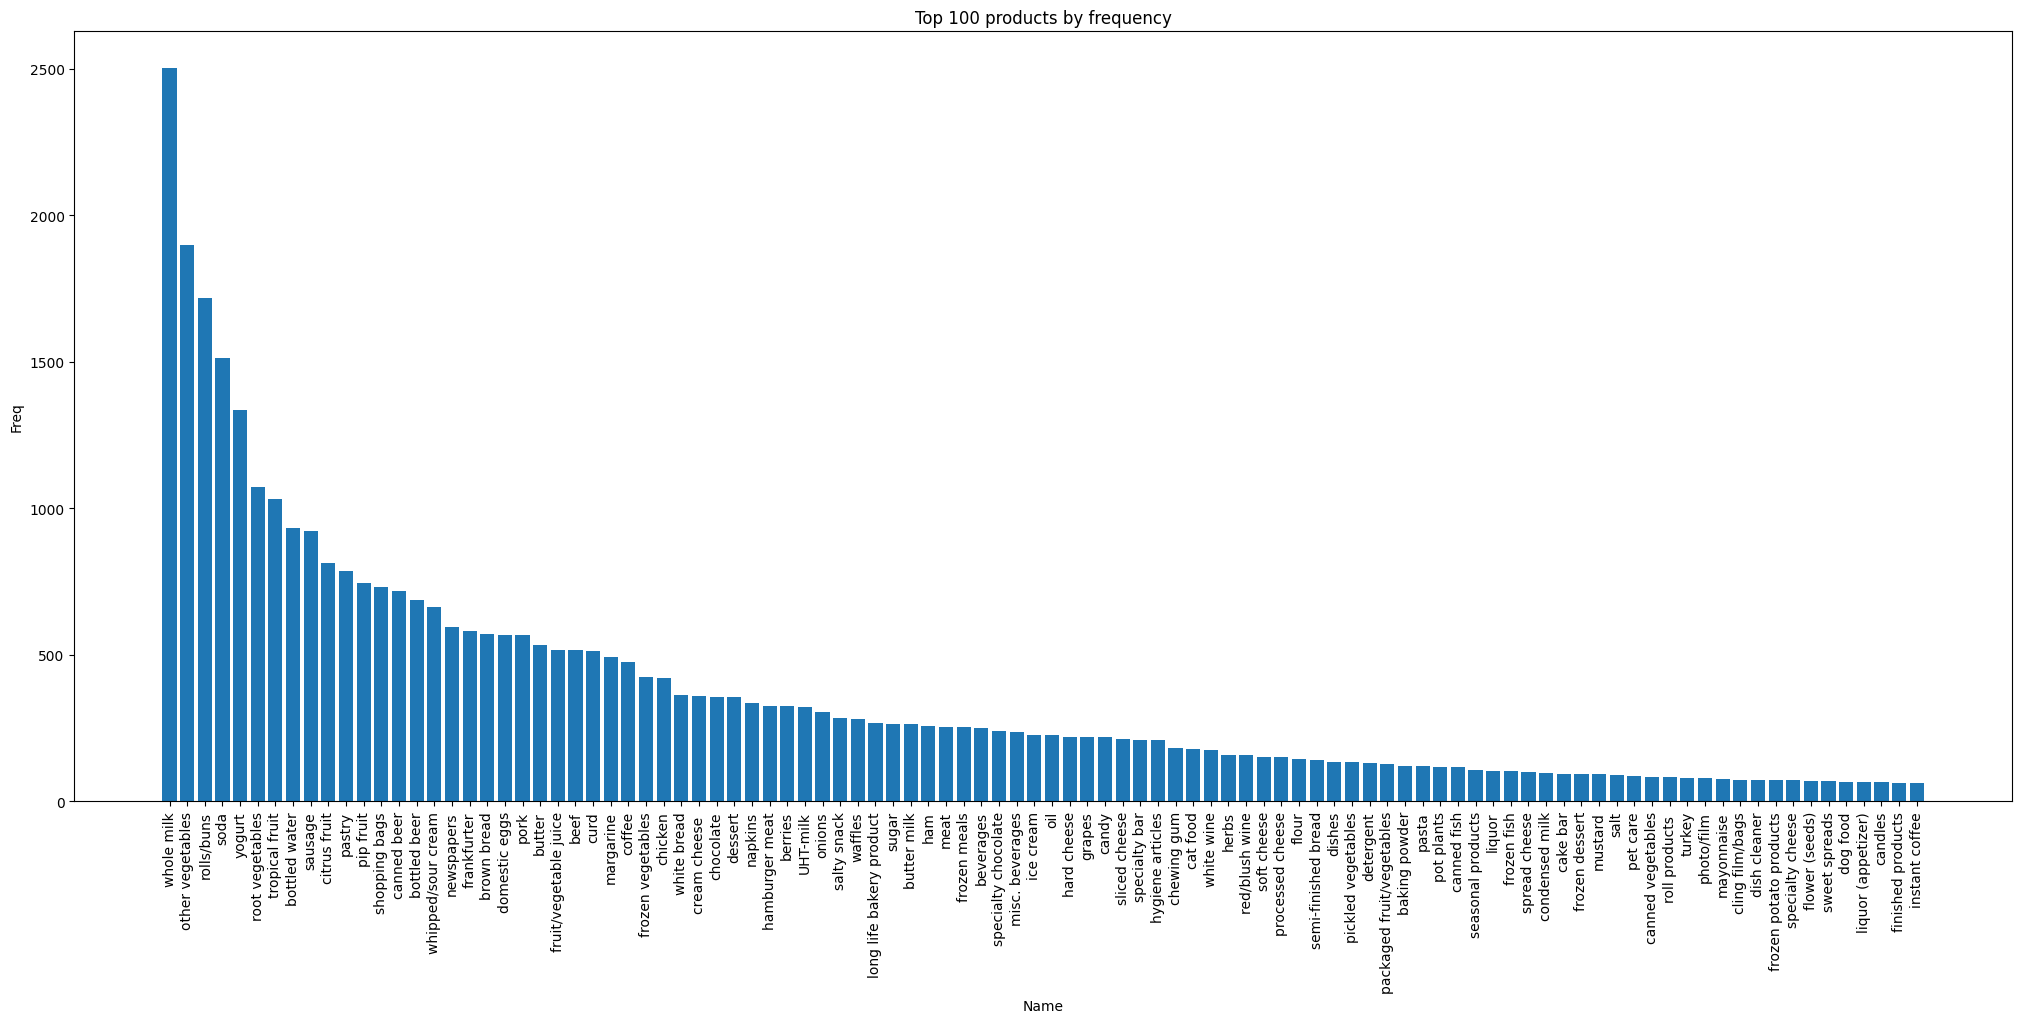

In [ ]:
product_name = [item[0] for item in product_freq_list[:100]]
frequency = [item[1] for item in product_freq_list[:100]]

plt.figure(figsize=(25, 10))

plt.bar(product_name, frequency)
plt.xlabel('Products')
plt.ylabel('Frequencies')
plt.title('Top 100 products by frequency')

plt.xticks(rotation=90)

plt.show()

In [ ]:
! ls f2
! cat f2/part-00000

Task 1c

In [ ]:
# f3
def f3(input_path):
    # Read baskets.csv into an RDD
    baskets_rdd = sc.textFile(input_path)

    # Remove header if it exists
    header = baskets_rdd.first()
    baskets_rdd = baskets_rdd.filter(lambda line: line != header)

    # Parse each line and extract Member_number and Date
    member_date_rdd = baskets_rdd.map(lambda line: line.split(",")).map(lambda x: (x[0], x[1]))

    # Convert Date to a set of distinct products bought by a member on that date
    member_baskets_rdd = member_date_rdd.groupByKey().mapValues(lambda dates: set(dates))

    # Count the number of baskets for each member
    baskets_count_rdd = member_baskets_rdd.map(lambda x: (x[0], len(x[1])))

    # Sort the results in descending order of the number of baskets
    sorted_baskets_count_rdd = baskets_count_rdd.sortBy(lambda x: x[1], ascending=False)

    # Select top 100 members with the largest number of baskets
    top_100_baskets_count = sorted_baskets_count_rdd.take(100)

    # Print results
    print("\nTop 100 Members with the Largest Number of Baskets:")
    for member, count in top_100_baskets_count:
        print("Member:", member, "| Number of Baskets:", count)

    # Save results to folder f3
    output_path = "f3"

    if os.path.exists(output_path):
        shutil.rmtree(output_path)

    # Save results to folder f3
    sorted_baskets_count_rdd.saveAsTextFile(output_path)

    # Visualize the top 100 members with a bar chart
    members, counts = zip(*top_100_baskets_count)
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(members)), counts, align='center')
    plt.xticks(range(len(members)), members, rotation=90)
    plt.xlabel('Member Number')
    plt.ylabel('Number of Baskets')
    plt.title('Top 100 Members with Largest Number of Baskets')
    plt.tight_layout()
    plt.show()


Top 100 Members with the Largest Number of Baskets:
Member: 1379 | Number of Baskets: 11
Member: 3737 | Number of Baskets: 11
Member: 2271 | Number of Baskets: 11
Member: 4338 | Number of Baskets: 11
Member: 2193 | Number of Baskets: 11
Member: 4376 | Number of Baskets: 10
Member: 1052 | Number of Baskets: 10
Member: 1574 | Number of Baskets: 10
Member: 1275 | Number of Baskets: 10
Member: 1908 | Number of Baskets: 10
Member: 3289 | Number of Baskets: 10
Member: 3120 | Number of Baskets: 10
Member: 3180 | Number of Baskets: 10
Member: 2394 | Number of Baskets: 10
Member: 4217 | Number of Baskets: 10
Member: 2524 | Number of Baskets: 10
Member: 4864 | Number of Baskets: 10
Member: 3872 | Number of Baskets: 10
Member: 3484 | Number of Baskets: 10
Member: 3082 | Number of Baskets: 10
Member: 3915 | Number of Baskets: 10
Member: 3248 | Number of Baskets: 10
Member: 1410 | Number of Baskets: 10
Member: 3593 | Number of Baskets: 10
Member: 2625 | Number of Baskets: 10
Member: 1793 | Number 

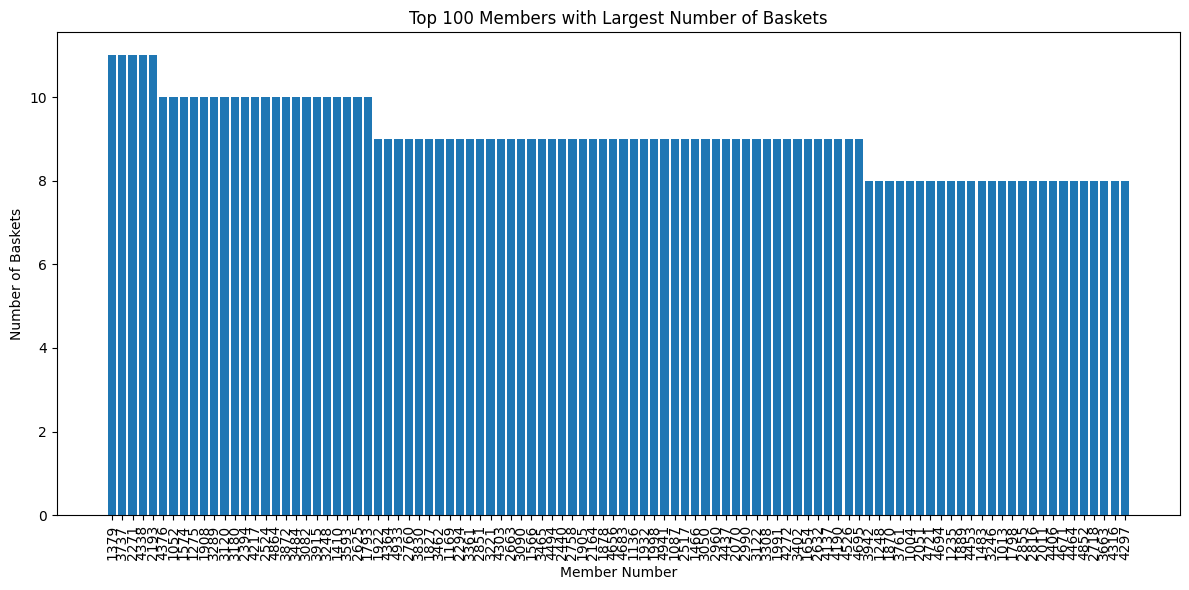

In [ ]:
input_path = "/content/drive/MyDrive/Colab_Notebooks/baskets.csv"
f3(input_path)

Task 1d

In [ ]:
# f4
# from pyspark import SparkContext, SparkConf
# Initialize Spark
conf = SparkConf().setAppName("f4")
sc = SparkContext(conf=conf)

# Read the CSV file
rdd = sc.textFile('/content/drive/MyDrive/Colab_Notebooks/baskets.csv')

# Split each line by comma
rdd = rdd.map(lambda line: line.split(","))

# Map each row to (member_number, itemDescription)
rdd = rdd.map(lambda x: (x[0], x[2]))

# Remove duplicates
rdd = rdd.distinct()

# Find the member that bought the largest number of distinct products
member = rdd.map(lambda x: (x[0], 1)).reduceByKey(lambda a, b: a + b).sortBy(lambda x: x[1], ascending=False).first()
print(f"Member {member[0]} bought the largest number of distinct products: {member[1]}")

# Find the product that is bought by the most members
product = rdd.map(lambda x: (x[1], 1)).reduceByKey(lambda a, b: a + b).sortBy(lambda x: x[1], ascending=False).first()
print(f"The product {product[0]} is bought by the most members: {product[1]}")

# Save the results
rdd.saveAsTextFile("f4")
# sc.stop()

Member 2051 bought the largest number of distinct products: 26
The product whole milk is bought by the most members: 1786


Task 2: DataFrame

In [ ]:
spark = SparkSession.builder.appName("BasketsAnalysis").getOrCreate()

In [ ]:
input_path = '/content/drive/MyDrive/Colab_Notebooks/baskets.csv'

In [ ]:
purchase_data = spark.read.csv(input_path, header=True, inferSchema=True)

In [ ]:
# Extract year, month, and day from the Date column
purchase_data = purchase_data.withColumn('year', F.year(F.to_date('Date', 'dd/MM/yyyy')))
purchase_data = purchase_data.withColumn('month', F.month(F.to_date('Date', 'dd/MM/yyyy')))
purchase_data = purchase_data.withColumn('day', F.dayofmonth(F.to_date('Date', 'dd/MM/yyyy')))

# Convert integer columns to string
purchase_data = purchase_data.withColumn('Member_number', F.col('Member_number').cast('string'))
purchase_data = purchase_data.withColumn('year', F.col('year').cast('string'))
purchase_data = purchase_data.withColumn('month', F.col('month').cast('string'))
purchase_data = purchase_data.withColumn('day', F.col('day').cast('string'))
# Group by Member_number, year, month, and day to create baskets
# Group by Member_number, year, month, and day to create baskets
baskets = purchase_data.groupBy('Member_number', 'year', 'month', 'day').agg(
    F.concat_ws(", ", F.collect_set('itemDescription')).alias('basket'))

# Sort the baskets by year, month, and day
baskets = baskets.orderBy('year', 'month', 'day')

# Show the resulting DataFrame
baskets.show(truncate=False)

+-------------+----+-----+---+-----------------------------------------------+
|Member_number|year|month|day|basket                                         |
+-------------+----+-----+---+-----------------------------------------------+
|1789         |2014|1    |1  |candles, hamburger meat                        |
|2542         |2014|1    |1  |bottled water, sliced cheese                   |
|1249         |2014|1    |1  |citrus fruit, coffee                           |
|1381         |2014|1    |1  |curd, soda                                     |
|1440         |2014|1    |1  |yogurt, other vegetables                       |
|1659         |2014|1    |1  |specialty chocolate, frozen vegetables         |
|1922         |2014|1    |1  |tropical fruit, other vegetables               |
|2226         |2014|1    |1  |sausage, bottled water                         |
|2237         |2014|1    |1  |Instant food products, bottled water           |
|2351         |2014|1    |1  |shopping bags, cleaner

In [ ]:
from pyspark.sql.functions import col

# Convert 'day' column to integers
baskets_count = baskets_count.withColumn('day', col('day').cast('int'))

# Sort the DataFrame by year, month, and day in ascending order
baskets_count = baskets_count.orderBy('year', 'month', 'day')

# Show the resulting DataFrame
baskets_count.show()

+----+-----+---+------------+
|year|month|day|basket_count|
+----+-----+---+------------+
|2014|    1|  1|          21|
|2014|    1|  2|          29|
|2014|    1|  3|          24|
|2014|    1|  4|          28|
|2014|    1|  5|          20|
|2014|    1|  6|          13|
|2014|    1|  7|          16|
|2014|    1|  8|          19|
|2014|    1|  9|          28|
|2014|    1| 10|          23|
|2014|    1| 11|          15|
|2014|    1| 12|          18|
|2014|    1| 13|          20|
|2014|    1| 14|          24|
|2014|    1| 15|          13|
|2014|    1| 16|          18|
|2014|    1| 17|          20|
|2014|    1| 18|          22|
|2014|    1| 19|          23|
|2014|    1| 20|          24|
+----+-----+---+------------+
only showing top 20 rows



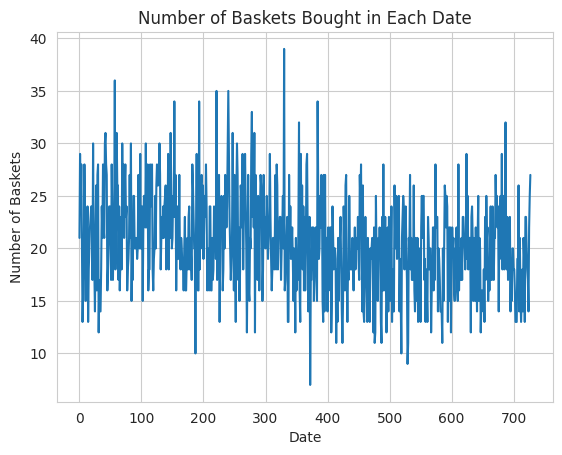

In [ ]:
# Convert PySpark DataFrame to Pandas for visualization
baskets_count_pd = baskets_count.toPandas()

# Draw a line chart to visualize the number of baskets bought in each date
plt.plot(baskets_count_pd['basket_count'])
plt.xlabel('Date')
plt.ylabel('Number of Baskets')
plt.title('Number of Baskets Bought in Each Date')
plt.show()


In [ ]:
# Save the resulting baskets to Parquet files in Colab's virtual file system
# Replace 'baskets_parquet' with the desired folder path
baskets.write.mode('overwrite').parquet('/content/baskets_parquet')

# Save the resulting baskets to a text file in Colab's virtual file system
# Replace 'baskets_text' with the desired folder path
baskets.select('basket').write.mode('overwrite').text('/content/baskets_text')

Task 3: PCY

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.ml.fpm import FPGrowth
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import size, col, concat_ws

class PCY:
    def __init__(self, file_path, s=0.003, c=0.05):
        self.file_path = file_path
        self.s = s
        self.c = c
        self.spark = self._create_spark_session()

    def _create_spark_session(self):
        conf = SparkConf().setAppName("PCY Algorithm").setMaster("local[*]")
        sc = SparkContext(conf=conf)
        return SparkSession(sc)

    def _load_data(self):
        return self.spark.read.text(self.file_path)

    def _create_baskets(self):
        data = self._load_data()
        if data.isEmpty():
            raise ValueError("Dataset is empty")
        baskets = data.rdd.map(lambda row: row.value.split(","))
        return baskets

    def run(self):
        baskets = self._create_baskets()

        schema = ArrayType(StringType())
        baskets_df = self.spark.createDataFrame(baskets, schema).withColumnRenamed("value", "items")


        fp_growth = FPGrowth(itemsCol="items", minSupport=self.s, minConfidence=self.c)
        model = fp_growth.fit(baskets_df)
        frequent_itemsets = model.freqItemsets

        frequent_pairs = frequent_itemsets.filter(size(col("items")) == 2)

        print("Frequent Pairs:")
        frequent_pairs.show(truncate=False)

        print("Frequent Pairs Count:", frequent_pairs.count())

        frequent_pairs_str = frequent_pairs.withColumn("items", concat_ws(",", "items"))
        frequent_pairs_str.write.csv("pcy_frequent_pairs.csv", header=True)

        association_rules = model.associationRules

        print("Association Rules:")
        association_rules.show(truncate=False)

        association_rules_str = association_rules.withColumn("antecedent", concat_ws(",", "antecedent")) \
                                                  .withColumn("consequent", concat_ws(",", "consequent"))

        association_rules_str.select("antecedent", "consequent", "confidence").write.csv("pcy_association_rules.csv", header=True)

pcy = PCY(file_path="/content/baskets_text/part-00000-b46e12be-d3bf-4930-b694-a165ed69f8e2-c000.txt")
pcy.run()


Frequent Pairs:
+-------------------------------------+----+
|items                                |freq|
+-------------------------------------+----+
|[ beef, whole milk]                  |65  |
|[ pork, whole milk]                  |72  |
|[ whipped/sour cream, whole milk]    |66  |
|[ coffee, whole milk]                |51  |
|[ citrus fruit, whole milk]          |100 |
|[ fruit/vegetable juice, whole milk] |59  |
|[citrus fruit,  rolls/buns]          |50  |
|[citrus fruit,  other vegetables]    |54  |
|[citrus fruit,  yogurt]              |52  |
|[ rolls/buns,  other vegetables]     |92  |
|[ rolls/buns, whole milk]            |186 |
|[ root vegetables,  rolls/buns]      |50  |
|[ root vegetables,  other vegetables]|51  |
|[ root vegetables,  soda]            |48  |
|[ root vegetables, whole milk]       |104 |
|[ brown bread, whole milk]           |62  |
|[ chicken, whole milk]               |46  |
|[pip fruit,  rolls/buns]             |50  |
|[pip fruit,  other vegetables]       |

In [ ]:
sc.stop()